# Diagrams playbook

Mal Minhas, 14.12.21

After coming across [this module](https://diagrams.mingrammer.com/) in a blog post, I thought I'd try it out to see if it was any good.  It was!  So I thought I'd write some notes on what I learned.

## 1. Installation

Create a virtualenv and then install both `diagrams` and `jupyterlab` in it:

```$ pip install diagrams jupyterlab```

You will also need to install `graphviz`.  On Mac you do this as follows:

```$ brew install graphviz```

Now you should be able to execute the following to create a simple EC2 diagram:

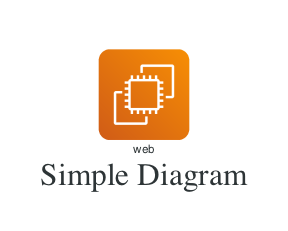

In [1]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

graph_attr = {
    "fontname": "Times-Roman",
    "fontsize": "35",
    "bgcolor": "transparent",
    "size": "5,5",
    "margin": "-1.0", # in inches
}

with Diagram("Simple Diagram", show=False, graph_attr=graph_attr) as diag:
    EC2("web")
diag

## 2. AWS event processing diagram

See [here](https://graphviz.org/docs/attrs/margin/) for more details on how to organise margins inside and outside the bounding box.  The example below uses different formatting options for the different `Cluster` boxes:

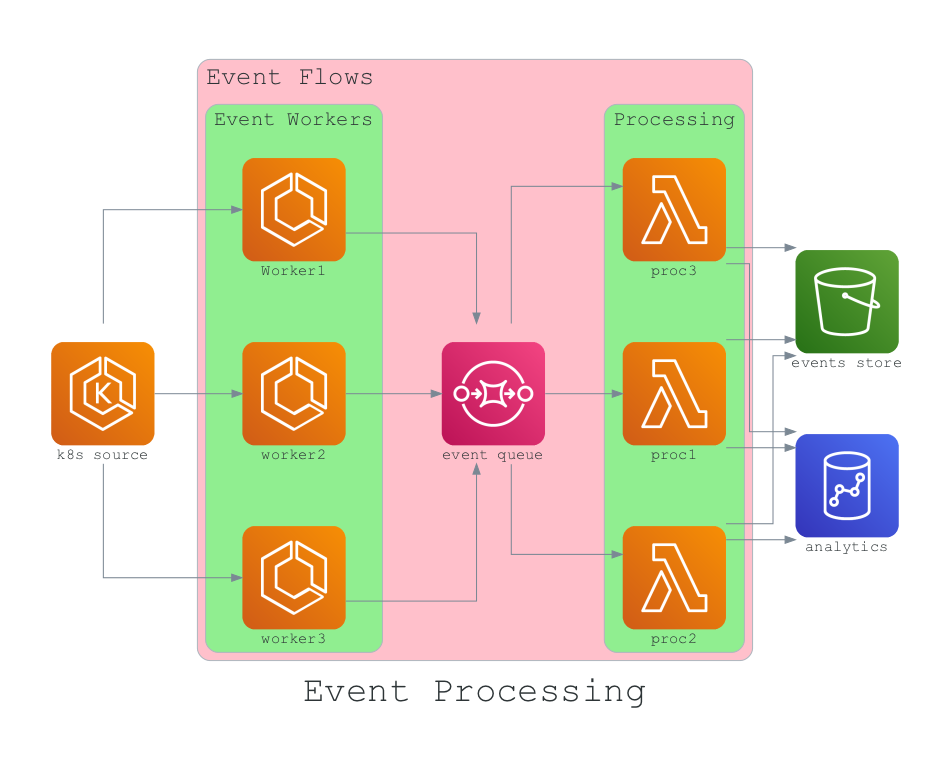

In [2]:
%%capture --no-display

from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

ft = "Courier New" # Could also be "Times-Roman", "Arial", "Arial Bold" or "Helvetica"

outer_graph_attr = {
    "fontname": ft,
    "fontsize": "35",
    "bgcolor": "transparent",
    "size": "20,10",
    "margin": "-1.0", # in inches
}

cluster1_graph_attr = {
    "fontname": ft,
    "fontsize": "25",
    "bgcolor": "pink",
    "margin": "8.0", # in inches
}

cluster2_graph_attr = {
    "fontname": ft,
    "fontsize": "20",
    "bgcolor": "lightgreen",
    "margin": "4.0", # in inches
}

with Diagram("Event Processing", show=False, graph_attr=outer_graph_attr) as diag:
    source = EKS("k8s source", fontname=ft, fontsize="15")
    with Cluster("Event Flows", graph_attr=cluster1_graph_attr):
        with Cluster("Event Workers", graph_attr=cluster2_graph_attr):
            workers = [ECS("Worker1", fontname=ft, fontsize="15"),
                       ECS("worker2", fontname=ft, fontsize="15"),
                       ECS("worker3", fontname=ft, fontsize="15")]
        queue = SQS("event queue", fontname=ft, fontsize="15")
        with Cluster("Processing", graph_attr=cluster2_graph_attr):
            handlers = [Lambda("proc1", fontname=ft, fontsize="15"),
                        Lambda("proc2", fontname=ft, fontsize="15"),
                        Lambda("proc3", fontname=ft, fontsize="15")]
    store = S3("events store", fontname=ft, fontsize="15")
    dw = Redshift("analytics", fontname=ft, fontsize="15")
    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw
diag

## 3. AWS ML Service Flowchart

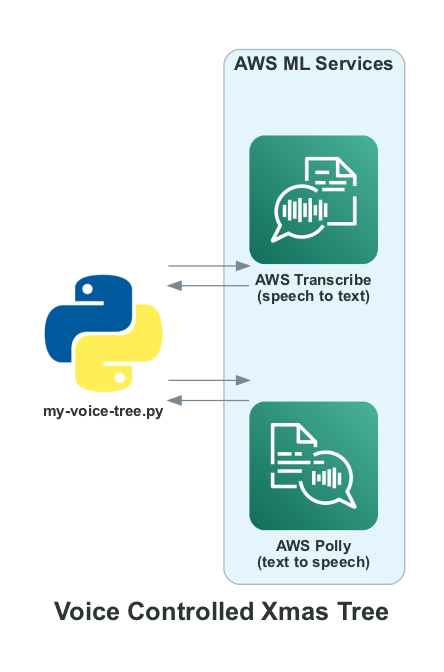

In [3]:
%%capture --no-display

from diagrams.aws.ml import Polly, Transcribe
from diagrams.programming.language import Python

ft = "Arial Bold" # Could also be "Times-Roman" or "Arial" or "Courier New"
ftsize = "12"

graph_attr = {
    "fontname": ft,
    "fontsize": "20",
    "bgcolor": "transparent",
    "size": "10,10",
    "margin": "-1.5", # in inches
}

cluster_graph_attr = {
    "fontname": ft,
    "fontsize": "15",
    "margin": "10.0",
}

with Diagram("Voice Controlled Xmas Tree", show=False, graph_attr=graph_attr) as diag:    
    rpi = Python("my-voice-tree.py",fontname=ft, fontsize=ftsize)
    with Cluster("AWS ML Services", graph_attr=cluster_graph_attr):
        aws = [Transcribe("AWS Transcribe\n(speech to text)", fontname=ft, fontsize=ftsize),
               Polly("AWS Polly\n(text to speech)", fontname=ft, fontsize=ftsize)]
    rpi << aws
    rpi >> aws
diag

## 4. Operational Model Flowchart

We are using `programming.flowchart` primitives for this example and turning off warnings:

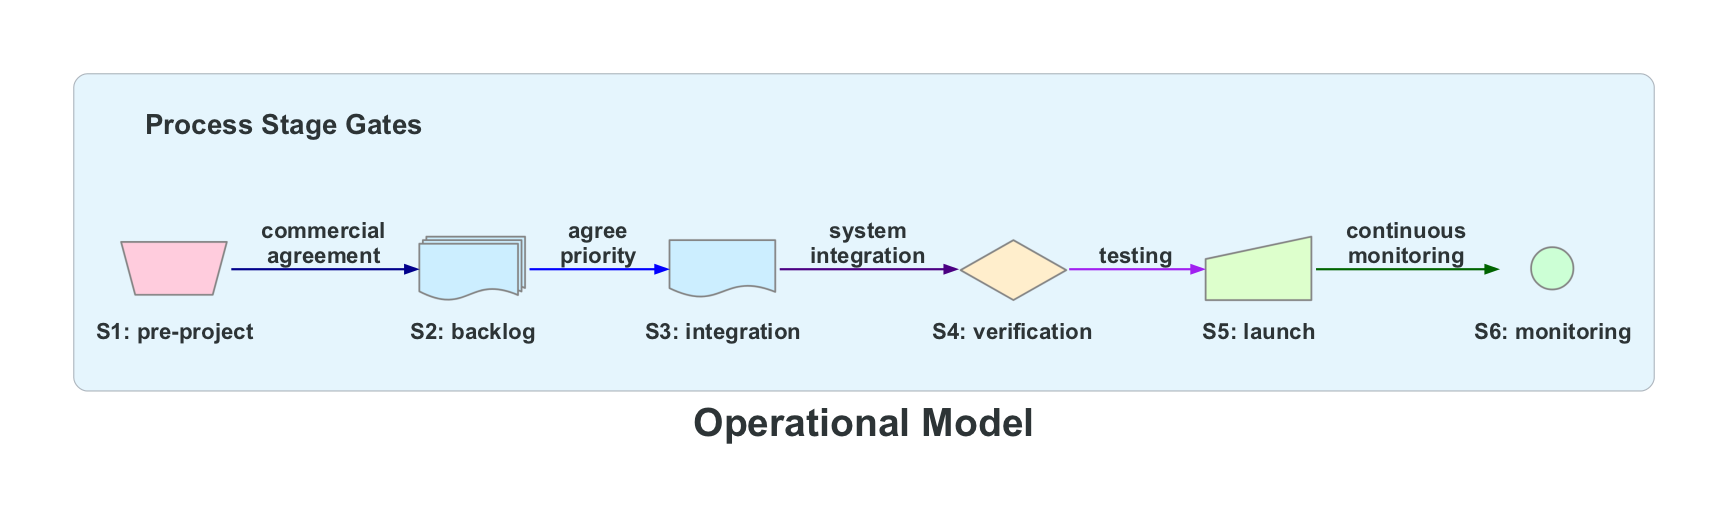

In [4]:
%%capture --no-display

from diagrams import Cluster, Diagram, Edge
from diagrams.programming.flowchart import *
from diagrams.aws.network import CloudMap
from diagrams.aws.management import OpsworksMonitoring
from diagrams.gcp.network import VirtualPrivateCloud

ft = "Arial Bold" # Could also be "Times-Roman" or "Arial" or "Courier New"
ftsize = "20"

graph_attr = {
    "fontname": ft,
    "fontsize": "35",
    "bgcolor": "transparent",
    "size": "20,20",
    "margin": "-1.0", # in inches
}

cluster_graph_attr = {
    "fontname": ft,
    "fontsize": "25",
    "margin": "40",
}

with Diagram("Operational Model", show=False, graph_attr=graph_attr) as diag:
    with Cluster("\n\tProcess Stage Gates", graph_attr=cluster_graph_attr):
        s1 = ManualLoop("S1: pre-project", fontname=ft, fontsize=ftsize)
        s2 = MultipleDocuments("S2: backlog", fontname=ft, fontsize=ftsize)
        s3 = Document("S3: integration", fontname=ft, fontsize=ftsize)
        s4 = Decision("S4: verification", fontname=ft, fontsize=ftsize)
        s5 = ManualInput("S5: launch", fontname=ft, fontsize=ftsize)
        s6 = Inspection("S6: monitoring", fontname=ft, fontsize=ftsize)
    s1 >> Edge(color="darkblue", label="commercial\nagreement", fontname=ft, fontsize=ftsize, style="bold") >> \
    s2 >> Edge(color="blue", label="agree\npriority", fontname=ft, fontsize=ftsize, style="bold") >> \
    s3 >> Edge(color="indigo", label="system\nintegration", fontname=ft, fontsize=ftsize, style="bold") >> \
    s4 >> Edge(color="purple", label="testing", fontname=ft, fontsize=ftsize, style="bold") >> \
    s5 >> Edge(color="darkgreen", label="continuous\nmonitoring", fontname=ft, fontsize=ftsize, style="bold") >> s6
diag